# CS559 Project1

Name：Tongze Zhang

Project: Clustering & Dimension Reduction Description: With a given data, the data provider wants to reduce the size of data (dimensions) before the modeling. Under the assumption that the provider does not know the details except that it has 200 features yet, you have the freedom of handling data – there are no specific ways of reducing the dimensions. Data Description: • Size – 201 columns and 200,000 rows. • Columns – Except the first column “ID_code”, the rest columns are not labeled. • Target – unknown. Task Ideas:

EDA – Considering the data size, it will not be a great idea to cluster or reduce dimensions using the original data. Therefore, by doing EDA, find out if there are any unique characteristics among columns and between columns.
Feature Engineering & Extraction – Using learning from EDA, determine columns can be used to create features or can be eliminated for further analysis.
Clustering Analysis – Determine the appropriate cluster number for this dataset. Considering the number of observations, you have to be creative on methodology to have the lower computational cost.
Dimension Reduction – Using the principal component analysis, determine how many principal components can be taken. Submission: • Code – can be submit as HW – HTML and ipynb. • Report – 4-5 pages formal report is required. The contents of reports are o Introduction: Do not need to explain the background of techniques or functions used unless if an author feels strongly. Have a brief explanation of work and the paper. o Methodology: Explain how the tasks were attacked and reasons the importance of steps. o Results: Explain what you found from the above section o Discussion & Conclusion: Evaluate the work, suggest alternative ways can be done, and report the final dimension the author like to propose to the data provider.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [2]:
#read the data and data cleaning
df  = pd.read_csv("S21_P1_trainset.csv")
df.head()
df = df.drop(['ID_code'],axis=1)

In [3]:
df.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


# 1. EDA
The correlation coefficient between the variables and visualization analysis

In [4]:
#Calculate the correlation
cor_ex = df.corr() 

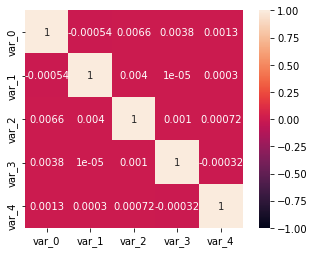

In [5]:
#Show the correlation of 5 variables 
sns.heatmap(cor_ex.iloc[0:5,0:5] , annot=True, vmax=1, vmin = -1, square=True)
plt.savefig('example.png', dpi=500, bbox_inches='tight')

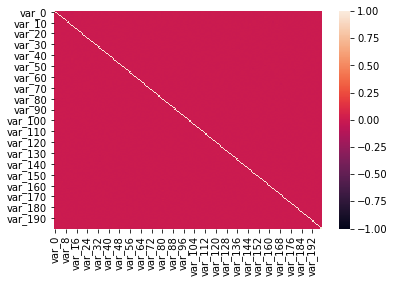

In [6]:
sns.heatmap(cor_ex ,vmax=1, vmin = -1)
plt.savefig('population.png', dpi=500, bbox_inches='tight')
plt.show()

# 2. Feature Engineering
In this step, the Variance Threshold method (data eigenvalue selection) is adopted. 

In [7]:
# Calculate the variance of varirbles and drop some variables
# Set a threshold value to 1
var = VarianceThreshold(threshold=1)
feature_select = var.fit(df)

In [8]:
# Select the features and transform the original data
feature_select
print("Variances is %s"%feature_select.variances_) #Show the Variances of variables 
print("After transform is %s"%feature_select.transform(df)) #Show the transformed data
print("The surport is %s"%df.columns[feature_select.get_support(True)]) #Show the retained variables

Variances is [9.24186309e+00 1.64027759e+01 6.97428726e+00 4.17513173e+00
 2.63460124e+00 6.18306538e+01 7.51004399e-01 1.16831822e+01
 1.11063908e+01 1.52539009e+00 3.02585724e+01 3.56437438e+01
 3.61223315e-02 2.15251820e+01 5.05306621e+00 1.69505447e-01
 6.54036944e+00 4.50589404e+01 6.16437064e+01 6.39467921e+01
 3.45301873e+01 6.71833197e+01 8.11082387e+00 2.77615323e-01
 1.42675102e+01 8.15300923e-02 3.50723933e+01 2.32169343e+00
 6.13661224e-01 6.84311577e+00 6.34440655e+01 4.66510410e+00
 6.69682827e+00 1.86823981e+01 2.93344471e-01 2.68276973e+01
 9.73421302e+00 5.06125922e+00 1.83089179e+01 1.65554141e+01
 6.85457900e+01 3.52607080e+01 4.84401180e-01 9.58513239e-02
 3.48460961e+01 4.58167947e+02 8.18248027e+00 1.11932910e+02
 1.29602362e+02 6.17126957e+01 4.78459041e-01 6.70316427e+01
 2.48554076e+01 5.84844199e-01 7.07990996e+01 3.23767592e+01
 1.25327684e+01 6.32063405e-01 1.84614176e+01 7.30676242e-01
 1.78284817e+01 1.35092249e+02 4.10561808e+00 9.69127482e+00
 2.20775046

# 3. Clustering Analysis
K-means algorithm is selected as the evaluation method and SSE as the evaluation index. In addition, as an improvement, Elkan K-means algorithm is used to replace the traditional K-means algorithm, which can save more time for calculation.

In [9]:
# The data processed by feature engineering is used for clustering
df_se = pd.DataFrame(data = feature_select.transform(df),columns = df.columns[feature_select.get_support(True)])

In [10]:
std = StandardScaler()
data_std=std.fit_transform(df_se)

SSE = []
k_SSE = []
#the number of cluster
for n_clusters in range(2,11):
    cls = KMeans(n_clusters).fit(data_std)
    score = cls.inertia_
    SSE.append(score)
    k_SSE.append(n_clusters)


    silhouette_score = []
k_sil = []

# the number of cluster 
for n_clusters in range(2,11):
    cls = KMeans(n_clusters).fit(data_std)
    pred_y=cls.labels_
    
    
    score =sm.silhouette_score(data_std, pred_y)
     
    silhouette_score.append(score)
    k_sil.append(n_clusters)

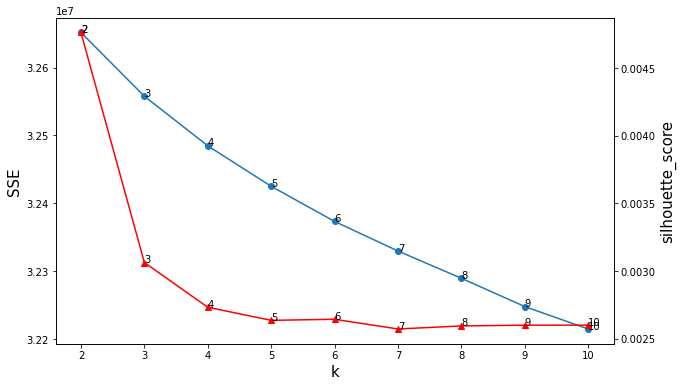

In [11]:
# Through data visualization, display of SSE and Silhouette Coefficient under different number of clusters

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.scatter(k_SSE, SSE)
ax1.plot(k_SSE, SSE)
ax1.set_xlabel("k",fontdict={'fontsize':15})
ax1.set_ylabel("SSE",fontdict={'fontsize':15})
ax1.set_xticks(range(11))
for x,y in zip(k_SSE,SSE):
    plt.text(x, y,x)

ax2 = ax1.twinx()
ax2.scatter(k_sil, silhouette_score,marker='^',c='red')
ax2.plot(k_sil, silhouette_score,c='red')
ax2.set_ylabel("silhouette_score",fontdict={'fontsize':15},)
for x,y in zip(k_sil,silhouette_score):
    plt.text(x, y,x)


plt.savefig('sse_silhouette.png', dpi=500, bbox_inches='tight')

# 4.PCA
By querying relevant literature, the premise of principal component analysis to obtain the minimum number of features is to retain 95% of data information, so the parameter n_components is set at 0.95.

In [12]:
# PCA
pca = PCA(n_components=0.95) 
pca.fit(data_std) # fit the model
pca.transform(data_std) 
print(pca.explained_variance_ratio_) # Show the variance_ratio of variables 
print(len(pca.components_ ))# Show the number of retained variables

[0.00715265 0.00643913 0.00642523 0.00642329 0.00640692 0.00639863
 0.00639317 0.00638835 0.00637432 0.0063706  0.00636782 0.00636223
 0.00635739 0.00635417 0.006342   0.00633743 0.00633195 0.00633153
 0.00632392 0.00632283 0.00631816 0.00631582 0.00630921 0.00629936
 0.00629767 0.00629721 0.00629225 0.00628523 0.00628142 0.00627753
 0.0062725  0.00626841 0.00626299 0.00626156 0.00625673 0.00624789
 0.00624589 0.00624315 0.00623904 0.00623342 0.00623186 0.00623071
 0.00622843 0.00622569 0.00621788 0.00621432 0.00621281 0.00621142
 0.00620424 0.00620268 0.00619945 0.00619874 0.00619293 0.00618752
 0.00618632 0.00618223 0.00617991 0.00617532 0.0061704  0.00616894
 0.00616443 0.00616133 0.00615968 0.00615363 0.00615021 0.00614728
 0.00614527 0.00614077 0.00613654 0.00613436 0.00612745 0.00612328
 0.00612151 0.0061186  0.00611376 0.00611163 0.00611094 0.00610558
 0.00610308 0.00609846 0.00609378 0.00609101 0.00608859 0.00608113
 0.00607861 0.00607393 0.00607244 0.00607078 0.00606746 0.0060

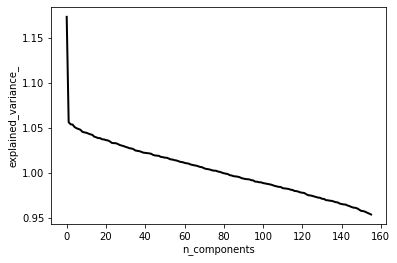

In [13]:
# Show the explianed_variance of differienct variables
plt.figure()
plt.plot(pca.explained_variance_, 'k', linewidth=2)
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.savefig('explain.png', dpi=500, bbox_inches='tight')
plt.show()